We do the generic commands, we load in the dataset, inspect for missing values, and understand the categories found in the target column.

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('Imputed Diseased Merged.csv')

In [3]:
# Assuming df is your dataframe
first_few_rows = df.head()

print(first_few_rows)

   Unnamed: 0     area  perimeter  physiological_length  physiological_width  \
0           1  65025.0     1020.0                   256                  256   
1           1  65025.0     1020.0                   256                  256   
2           2  65025.0     1020.0                   256                  256   
3           3  65025.0     1020.0                   256                  256   
4           4  65025.0     1020.0                   256                  256   

   aspect_ratio  rectangularity  circularity  major_axis  minor_axis  ...  \
0           1.0        0.992203     0.785398         256         256  ...   
1           1.0        0.992203     0.785398         256         256  ...   
2           1.0        0.992203     0.785398         256         256  ...   
3           1.0        0.992203     0.785398         256         256  ...   
4           1.0        0.992203     0.785398         256         256  ...   

      mean_g     mean_b   stddev_r   stddev_g   stddev_b

In [4]:
print("\nMissing values in the dataset clean:")
print(df.isnull().sum())


Missing values in the dataset clean:
Unnamed: 0                    0
area                          0
perimeter                     0
physiological_length          0
physiological_width           0
aspect_ratio                  0
rectangularity                0
circularity                   0
major_axis                    0
minor_axis                    0
convex_area                   0
convex_ratio                  0
mean_r                        0
mean_g                        0
mean_b                        0
stddev_r                      0
stddev_g                      0
stddev_b                      0
contrast                      0
correlation                   0
inverse_difference_moments    0
entropy                       0
classlabel                    0
dtype: int64


In [5]:
unique_categories =  df['classlabel'].unique()

print("Unique categories (diseases) found in the target column 'classlabel':")
for category in unique_categories:
    print(category)

Unique categories (diseases) found in the target column 'classlabel':
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [6]:
print("Unique categories (diseases) found in the target column 'classlabel' and their counts:")
for category in unique_categories:
    count = df[df['classlabel'] == category].shape[0]
    print(f"{category}: {count}")


Unique categories (diseases) found in the target column 'classlabel' and their counts:
Tomato___Bacterial_spot: 2127
Tomato___Early_blight: 1000
Tomato___healthy: 1591
Tomato___Late_blight: 1757
Tomato___Leaf_Mold: 952
Tomato___Septoria_leaf_spot: 1771
Tomato___Spider_mites Two-spotted_spider_mite: 1676
Tomato___Target_Spot: 1404
Tomato___Tomato_mosaic_virus: 373
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 3234


In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('physiological_length', axis=1, inplace=True)
df.drop('physiological_width', axis=1, inplace=True)
df.drop('aspect_ratio', axis=1, inplace=True)
df.drop('major_axis', axis=1, inplace=True)
df.drop('minor_axis', axis=1, inplace=True)
df.drop('convex_area', axis=1, inplace=True)



In [8]:
from sklearn.preprocessing import StandardScaler

# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['area', 'perimeter','rectangularity', 'circularity', 'convex_ratio', 'mean_r', 'mean_g', 'mean_b', 'stddev_r', 'stddev_g', 'stddev_b', 'contrast', 'correlation', 'inverse_difference_moments', 'entropy']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

We now begin to encode the target column, split dataset into training and test splits, and apply models.

In [9]:
X = df.drop('classlabel', axis=1)
y = df['classlabel']

y_encoded = pd.get_dummies(y)

In [10]:
print("\nColumns of the dataset:")
print(y_encoded.columns)


Columns of the dataset:
Index(['Tomato___Bacterial_spot', 'Tomato___Early_blight',
       'Tomato___Late_blight', 'Tomato___Leaf_Mold',
       'Tomato___Septoria_leaf_spot',
       'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
       'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'],
      dtype='object')


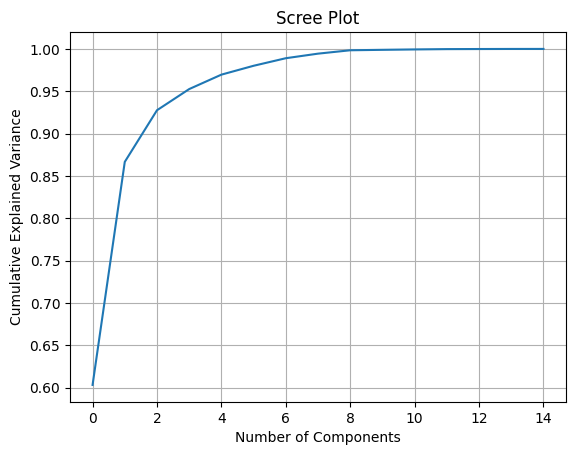

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


# Initialize PCA
pca = PCA()

# Fit PCA on your scaled numerical features
pca.fit(X[numerical_cols])

# Plot explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


In [14]:
# Initialize PCA with desired number of components
pca = PCA(n_components=13)  # Choose the number of components you want to keep

# Fit PCA on your scaled numerical features
X_pca = pca.fit_transform(X[numerical_cols])

In [15]:
from sklearn.model_selection import train_test_split

x_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Random Forest Classifier:

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

# Predicting the class labels for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate metrics
accuracy_rfc = accuracy_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
precision_rfc = precision_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
recall_rfc = recall_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
f1_rfc = f1_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

# Print metrics
print("Random Forest Classifier Model:")
print("Accuracy:", accuracy_rfc)
print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("F1 Score:", f1_rfc)

Random Forest Classifier Model:
Accuracy: 0.5546112684922884
Precision: 0.7665018543625711
Recall: 0.5546112684922884
F1 Score: 0.5745806384979592


K-Nearest Neighbours Classifier:

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)

# Predicting the class labels for the test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculate metrics for KNN
accuracy_knn = accuracy_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1))
precision_knn = precision_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), average='weighted')
recall_knn = recall_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), average='weighted')
f1_knn = f1_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), average='weighted')

# Print metrics for KNN
print("K-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

K-Nearest Neighbors Metrics:
Accuracy: 0.4916587976078061
Precision: 0.6246347865050322
Recall: 0.4916587976078061
F1 Score: 0.5027616089346628


Decision Tree Classifier:

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train)

# Predicting the class labels for the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate metrics for Decision Tree
accuracy_dt = accuracy_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1))
precision_dt = precision_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), average='weighted')
recall_dt = recall_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), average='weighted')
f1_dt = f1_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), average='weighted')

# Print metrics for Decision Tree
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

Decision Tree Metrics:
Accuracy: 0.5561850802644004
Precision: 0.559000312141055
Recall: 0.5561850802644004
F1 Score: 0.5571014027282881


Classification Report Evaluation of the three models:

In [22]:
from sklearn.metrics import classification_report

print("\nClassification Report for Random Forest Classifier:")
print(classification_report(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), target_names=y_encoded.columns))

print("\nClassification Report for K-Nearest Classifier:")
print(classification_report(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), target_names=y_encoded.columns))

print("\nClassification Report for Decision Tree Classifier:")
print(classification_report(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), target_names=y_encoded.columns))


Classification Report for Random Forest Classifier:
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.24      0.90      0.37       405
                        Tomato___Early_blight       0.81      0.11      0.19       201
                         Tomato___Late_blight       0.82      0.60      0.69       358
                           Tomato___Leaf_Mold       0.82      0.14      0.25       187
                  Tomato___Septoria_leaf_spot       0.88      0.43      0.58       365
Tomato___Spider_mites Two-spotted_spider_mite       0.82      0.47      0.59       322
                         Tomato___Target_Spot       0.77      0.27      0.40       288
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.87      0.78      0.82       656
                 Tomato___Tomato_mosaic_virus       0.94      0.70      0.80        69
                             Tomato___healthy       0.88      0.58      0.70

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to train and evaluate a model
def train_evaluate_model(classifier, X_train, y_train, X_test, y_test):
    # Initialize and train the classifier
    classifier.fit(X_train, y_train)

    # Predicting the class labels for the test set
    y_pred = classifier.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
    precision = precision_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
    recall = recall_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
    f1 = f1_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

    # Print metrics
    print(f"{type(classifier).__name__} Model:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()

# Initialize classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize RFE with Random Forest classifier for feature selection
rfe_rf = RFE(estimator=rf_classifier, n_features_to_select=10)  # Adjust the number of features as needed

# Train and evaluate Random Forest model with feature selection
train_evaluate_model(rfe_rf, x_train, y_train, X_test, y_test)

# Train and evaluate K-Nearest Neighbors model without feature selection
train_evaluate_model(knn_classifier, x_train, y_train, X_test, y_test)

# Train and evaluate Decision Tree model without feature selection
train_evaluate_model(dt_classifier, x_train, y_train, X_test, y_test)


RFE Model:
Accuracy: 0.56657223796034
Precision: 0.7752394437387453
Recall: 0.56657223796034
F1 Score: 0.5865349428231672

KNeighborsClassifier Model:
Accuracy: 0.4916587976078061
Precision: 0.6246347865050322
Recall: 0.4916587976078061
F1 Score: 0.5027616089346628

DecisionTreeClassifier Model:
Accuracy: 0.5561850802644004
Precision: 0.559000312141055
Recall: 0.5561850802644004
F1 Score: 0.5571014027282881



There is a concern from the classification evaluation of overfitting, so we shall perform cross-validation on all three models to assess this worry.

In [ ]:
from sklearn.model_selection import cross_val_score

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_classifier, X, y_encoded, cv=126)
print("Random Forest Classifier:")
print("Cross-Validation Accuracy:", rf_scores.mean())

# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_val_score(knn_classifier, X, y_encoded, cv=126)
print("\nK-Nearest Neighbors Classifier:")
print("Cross-Validation Accuracy:", knn_scores.mean())

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_classifier, X, y_encoded, cv=126)
print("\nDecision Tree Classifier:")
print("Cross-Validation Accuracy:", dt_scores.mean())


Random Forest Classifier:
Cross-Validation Accuracy: 0.4075576862416008

K-Nearest Neighbors Classifier:
Cross-Validation Accuracy: 0.42976373984997907

Decision Tree Classifier:
Cross-Validation Accuracy: 0.4972086822480524


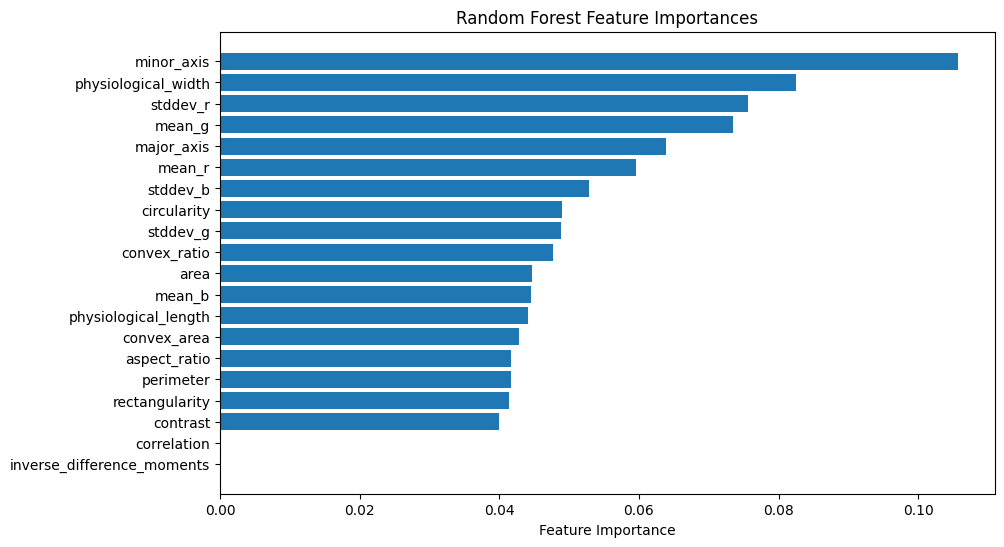

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming you've already trained the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get the feature importances
feature_importances = rf_classifier.feature_importances_

# Sort the features by importance
sorted_indices = feature_importances.argsort()

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices])
plt.yticks(range(len(feature_importances)), [X.columns[i] for i in sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

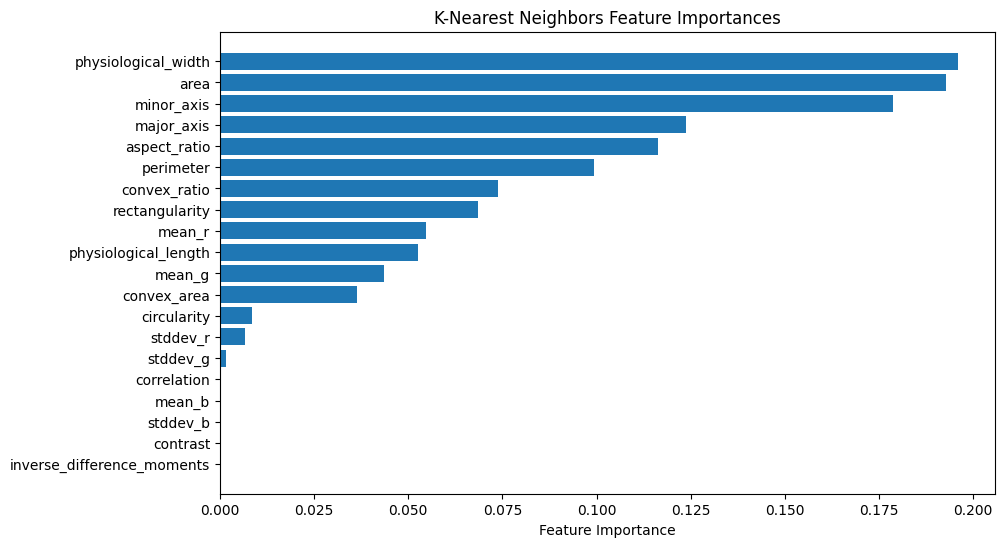

In [ ]:
from sklearn.inspection import permutation_importance

# Assuming you've already trained the K-NN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Calculate permutation feature importance
result = permutation_importance(knn_classifier, X_test, y_test, n_repeats=10, random_state=42)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sorted_indices = result.importances_mean.argsort()
plt.barh(range(len(result.importances_mean)), result.importances_mean[sorted_indices])
plt.yticks(range(len(result.importances_mean)), [X.columns[i] for i in sorted_indices])
plt.xlabel("Feature Importance")
plt.title("K-Nearest Neighbors Feature Importances")
plt.show()

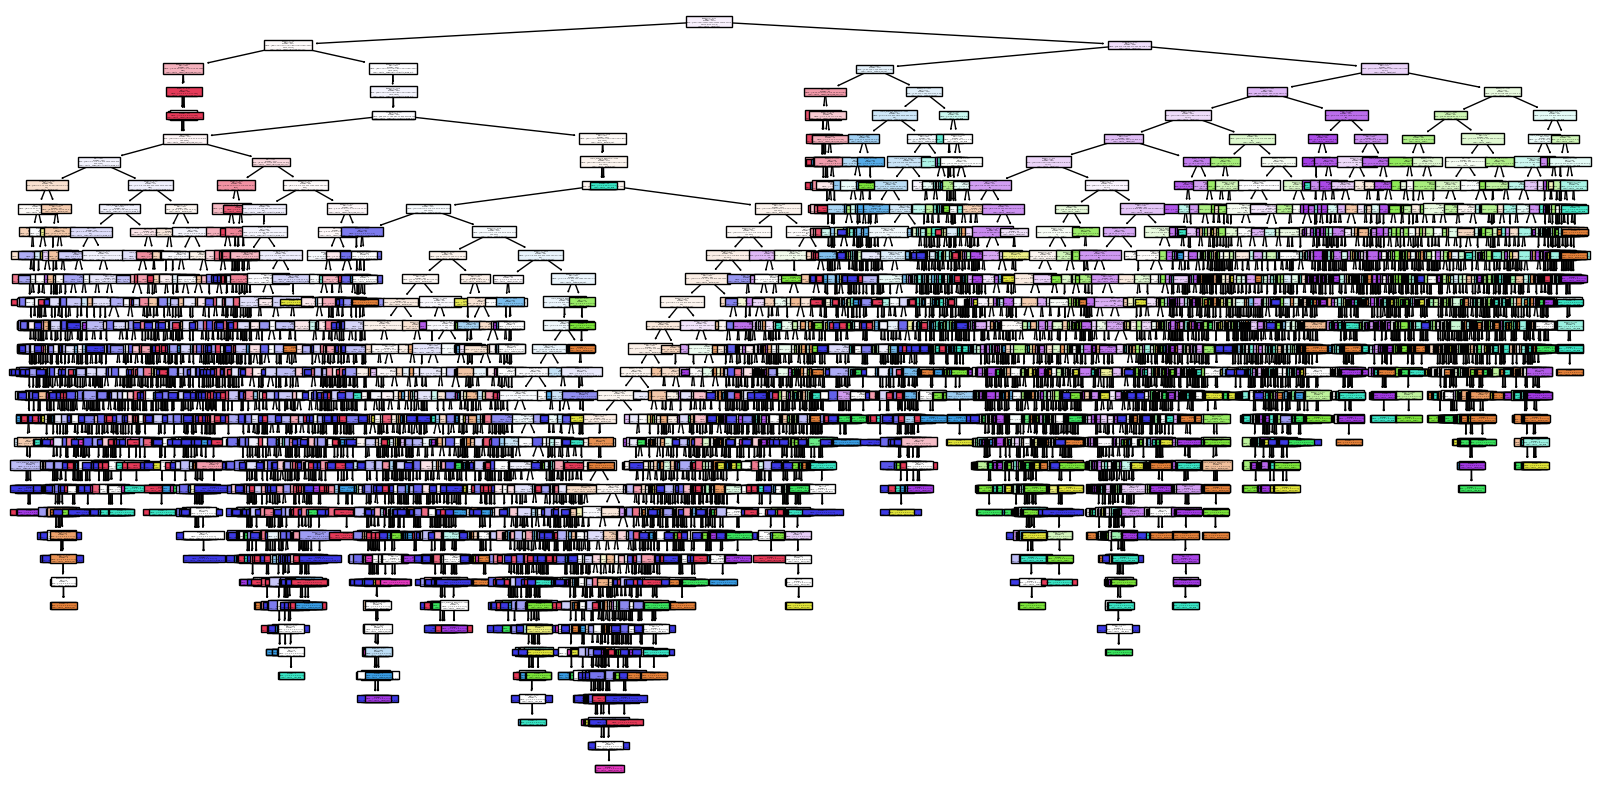

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming you have your dataset loaded into a DataFrame called 'df'

# Assuming your target column is named 'target'
X = df.drop('classlabel', axis=1)
y = df['classlabel']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()


In [ ]:
import joblib

# Save the model to a file
joblib.dump(dt_classifier, 'C:/Users/abdul/Desktop/Foliar research/Decision Tree Model/decision_tree_model.joblib')

['C:/Users/abdul/Desktop/Foliar research/Decision Tree Model/decision_tree_model.joblib']